In [1]:
import os
import sys

import pyNastran
import csv

from pyNastran.bdf.bdf import BDF, read_bdf
from pyNastran.bdf.subcase import * # for write_set
from pyNastran.utils import object_attributes, object_methods
from pyNastran.bdf.mesh_utils.mass_properties import mass_properties

print (pyNastran.__file__)
print (pyNastran.__version__)
pkg_path = pyNastran.__path__[0]
print ("Package path: ", pkg_path)
workspace_path = '/workspace/nastrancore/'
model_path = workspace_path + 'models'

/workspace/.pip-modules/lib/python3.8/site-packages/pyNastran/__init__.py
1.4.0+dev.no.checksum.error
Package path:  /workspace/.pip-modules/lib/python3.8/site-packages/pyNastran


# Element Area Histogram Plot
How to plot the Element Area as a plot to global x y z coordinates?
How to plot the part Area along x y z coordinates?

In [2]:
# get dict area['x']

In [3]:
bdf_filename="models/source.bdf"
#bdf = BDF()
# if the bdf does not contain all data, set cross-reference off
bdf = read_bdf(bdf_filename, xref=False, punch=False)

In [4]:
bdf_filename2 = os.path.abspath(os.path.join(model_path, 'pyNastran_models', 'iSat', 'ISat_Dploy_Sm.dat'))
print(bdf_filename)
bdf_xref = read_bdf(bdf_filename2, xref=True)
# os.listdir('/workspace/nastrancore/models/pyNastran_models')

models/source.bdf


In [5]:
# test with one element
element_list = list(bdf.elements)
element_list
#bdf.Element(element_list[3]).Area_no_xref(bdf)
ele = bdf.Element(2370465)
for nid in ele.nodes:
    node = bdf.Node(nid)
    print("Node %s: x %f y %f z %f" % (node.nid, node.xyz[0], node.xyz[1], node.xyz[2]))

Node 3865245: x 548.454900 y -845.120000 z 3.291688
Node 3865246: x 545.186700 y -843.700000 z 10.459720
Node 3865248: x 553.395600 y -843.700000 z 10.214350


In [6]:
# extract list of elements with existent nodes
number_of_element_cards = len(element_list)
print("Number of element cards: ", number_of_element_cards)

element_list_ok = []
for eid in element_list:
    ele = bdf.Element(eid)
    ok = 0
    #print(len(ele.nodes))
    for nid in ele.nodes:
        try: 
            node = bdf.Node(nid)
            #print("Element %i Node %i OK" % (eid, nid))
            ok = ok + 1
        except:
            print("Element %i Node %i not found" % (eid, nid))
    if (len(ele.nodes) == ok):
        element_list_ok.append(eid)
    else:
        print("Element %i: %i nodes not found" % (eid, len(ele.nodes)-ok))
print("Number of Element cards with existent GRID cards: ", len(element_list_ok))


Number of element cards:  825
Number of Element cards with existent GRID cards:  825


If you have a model read by xref=no, it seems to be not possible easily to access all the area information at once. Following code shows that it only calculates the CQUAD area, but not the CTRIA area.

In [7]:
# loop over all elements
# x, y = [ (bdf.Element(eleid).Area_no_xref(bdf), bdf.Element(eleid).eid) for eleid in element_list ]

# extract list of elements with existent nodes
number_of_element_cards = len(element_list)
print("Number of element cards: ", number_of_element_cards)

element_list_ok = []
total_area = 0
area = 0
for eid in element_list:
    ele = bdf.Element(eid)
    ok = 0
    #print(len(ele.nodes))
    for nid in ele.nodes:
        try: 
            node = bdf.Node(nid)
            #print("Element %i Node %i OK" % (eid, nid))
            ok = ok + 1
        except:
            print("Element %i Node %i not found" % (eid, nid))
    if (len(ele.nodes) == ok):
        try:
            total_area += ele.Area_no_xref(bdf)
            element_list_ok.append(eid)
        except Exception as e:
            print("ERROR: Element area of element %i" % (eid))
            print(e)
    else:
        print("Element %i: %i nodes not found" % (eid, len(ele.nodes)-ok))
print("Number of Element cards with existent GRID cards: ", len(element_list_ok))
print("Total area: ", total_area)


Number of element cards:  825
ERROR: Element area of element 2370465
'CTRIA3' object has no attribute 'Area_no_xref'
ERROR: Element area of element 2370468
'CTRIA3' object has no attribute 'Area_no_xref'
ERROR: Element area of element 2370477
'CTRIA3' object has no attribute 'Area_no_xref'
ERROR: Element area of element 2370479
'CTRIA3' object has no attribute 'Area_no_xref'
ERROR: Element area of element 2370481
'CTRIA3' object has no attribute 'Area_no_xref'
ERROR: Element area of element 2370488
'CTRIA3' object has no attribute 'Area_no_xref'
ERROR: Element area of element 2370489
'CTRIA3' object has no attribute 'Area_no_xref'
ERROR: Element area of element 2370499
'CTRIA3' object has no attribute 'Area_no_xref'
ERROR: Element area of element 2370500
'CTRIA3' object has no attribute 'Area_no_xref'
ERROR: Element area of element 2370510
'CTRIA3' object has no attribute 'Area_no_xref'
ERROR: Element area of element 2370511
'CTRIA3' object has no attribute 'Area_no_xref'
ERROR: Elemen

# Satelite model with xref

In [8]:
# loop over all elements
# x, y = [ (bdf.Element(eleid).Area_no_xref(bdf), bdf.Element(eleid).eid) for eleid in element_list ]

bdf = bdf_xref
element_list = list(bdf.elements)

# extract list of elements with existent nodes
number_of_element_cards = len(element_list)
print("Number of element cards: ", number_of_element_cards)

element_list_ok = []
total_area = 0
area = 0
for eid in element_list:
    ele = bdf.Element(eid)
    ok = 0
    #print(len(ele.nodes))
    for nid in ele.nodes:
        try: 
            node = bdf.Node(nid)
            #print("Element %i Node %i OK" % (eid, nid))
            ok = ok + 1
        except:
            print("Element %i Node %i not found" % (eid, nid))
    if (len(ele.nodes) == ok):
        try:
            total_area += ele.Area()
            element_list_ok.append(eid)
        except Exception as e:
            print("ERROR: Element area of element %i" % (eid))
            print(e)
    else:
        print("Element %i: %i nodes not found" % (eid, len(ele.nodes)-ok))
print("Number of Element cards with existent GRID cards: ", len(element_list_ok))
print("Total area: ", total_area)



Number of element cards:  5523
ERROR: Element area of element 3684
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 3685
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 3686
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 3687
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 3688
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 3689
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 3696
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 3697
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 3698
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 3699
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 3700
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 3701
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 3702
'CHEXA8' object has n

ERROR: Element area of element 5564
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 5565
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 5566
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 5567
'CHEXA8' object has no attribute 'Area'
ERROR: Element area of element 5568
'CHEXA8' object has no attribute 'Area'
Number of Element cards with existent GRID cards:  5402
Total area:  18913.8867377911


In [9]:
print(bdf.get_bdf_stats())
print("card_count = %s\n" % bdf.card_count)
print("reject_count = %s" % bdf.reject_count)

---BDF Statistics---
SOL 103

bdf.params
  PARAM    : 6

bdf.nodes
  GRID     : 5367

bdf.elements
  CBAR     : 790
  CBUSH    : 96
  CHEXA    : 25
  CQUAD4   : 4580
  CTRIA3   : 32

bdf.rigid_elements
  RBE2     : 43

bdf.properties
  PBARL    : 18
  PBUSH    : 1
  PSHELL   : 8
  PSOLID   : 4

bdf.masses
  CONM2    : 15

bdf.materials
  MAT1     : 13
  MAT8     : 8

bdf.coords
  CORD2R   : 73

bdf.methods
  EIGRL    : 1

bdf.usets
  USET     : 2


card_count = {'ENDDATA': 1, 'PARAM': 6, 'USET': 2, 'SUPORT': 1, 'EIGRL': 1, 'CORD2R': 73, 'GRID': 5367, 'CQUAD4': 4580, 'CBAR': 790, 'CHEXA': 25, 'RBE2': 43, 'CTRIA3': 32, 'CBUSH': 96, 'CONM2': 15, 'MAT1': 13, 'MAT8': 8, 'PSHELL': 8, 'PBARL': 18, 'PSOLID': 4, 'PBUSH': 1}

reject_count = {}


There are already methods in pyNastran regarding area and mass statistics. These are called get_area_breakdown and get_mass_breakdown. Here the example:

In [10]:
# Here the example from Steve regarding mass and area, slightly adjusted

mass, cg, I = mass_properties(bdf_xref)
print("mass = %s\n" % mass)

#mass_properties(bdf_xref)
area_breakdown = bdf_xref.get_area_breakdown(property_ids=None, sum_bar_area=True)
areax = bdf_xref.get_area_breakdown()
table_lines = ['%-3s: %.3f\n' % (k, v) for k, v in sorted(area_breakdown.items())]
print('area_breakdown:\n%s\n' % ''.join(table_lines))
pid_area_sum = 0
for p, a in area_breakdown.items():
    pid_area_sum += a
print('total of properties: ', pid_area_sum)



pids_to_mass, mass_type_to_mass = bdf_xref.get_mass_breakdown(property_ids=None, stop_if_no_mass=True)
table_lines = ['%-3s: %.6f\n' % (k, v) for k, v in sorted(pids_to_mass.items())]
print('mass_breakdown properties:\n%s' % ''.join(table_lines))
pid_mass_sum = 0
for p,m in pids_to_mass.items():
    pid_mass_sum += m
print('total of properties: ', pid_mass_sum)
print('mass_breakdown masses:\n%s\n' % mass_type_to_mass)

# volume_breakdown = bdf_xref.get_volume_breakdown(property_ids=None)
# table_lines = ['%-3s: %.3f\n' % (k, v) for k, v in sorted(volume_breakdown.items())]
# print('volume_breakdown:\n%s' % ''.join(table_lines))

mass = 1.7736369802686038

area_breakdown:
1  : 2808.000
2  : 3775.822
3  : 3126.701
4  : 28.331
7  : 2815.099
9  : 14.828
10 : 0.471
12 : 0.536
13 : 0.889
14 : 0.704
15 : 0.583
16 : 0.615
19 : 27.937
21 : 1.885
22 : 0.134
23 : 0.176
33 : 4.524
34 : 726.206
36 : 8.228
37 : 3528.000
38 : 1270.343
39 : 2.632
41 : 1.131
42 : 10.990
43 : 18.115
46 : 741.006


total of properties:  18913.88673779132
mass_breakdown properties:
1  : 0.027278
2  : 0.047993
3  : 0.020998
4  : 0.011251
5  : 0.330158
7  : 0.027813
8  : 0.081584
9  : 0.077642
10 : 0.000236
11 : 0.041700
12 : 0.000457
13 : 0.003885
14 : 0.000353
15 : 0.003626
16 : 0.000000
19 : 0.017749
20 : 0.163082
21 : 0.003625
22 : 0.000000
23 : 0.000000
33 : 0.001346
34 : 0.003561
36 : 0.007197
37 : 0.094566
38 : 0.007602
39 : 0.002433
41 : 0.000735
42 : 0.008854
43 : 0.012241
46 : 0.003671

total of properties:  1.001636970268623
mass_breakdown masses:
{'CONM2': 0.7720000099999998}



In [11]:
element_mass = {}
for eleid in bdf.elements.keys():
    ele = bdf.Element(eleid)
    element_mass[eleid] = ele.Mass()
print(element_mass)

{1: 4.857173743195999e-05, 2: 4.857173743195999e-05, 3: 4.857173743195999e-05, 4: 4.857173743195999e-05, 5: 4.857173743195999e-05, 6: 4.857173743195999e-05, 7: 4.857173743195999e-05, 8: 4.857173743195999e-05, 9: 4.857173743195999e-05, 10: 4.857173743195999e-05, 11: 4.857173743195999e-05, 12: 4.857173743195999e-05, 13: 4.857173743195999e-05, 14: 4.857173743195999e-05, 15: 4.857173743195999e-05, 16: 4.857173743195999e-05, 17: 4.857173743195999e-05, 18: 4.857173743195999e-05, 19: 4.857173743195999e-05, 20: 4.857173743195999e-05, 21: 4.857173743195999e-05, 22: 4.857173743195999e-05, 23: 4.857173743195999e-05, 24: 4.857173743195999e-05, 25: 3.8857389945567993e-05, 26: 1.9428694972783997e-05, 27: 1.9428694972783997e-05, 28: 3.8857389945567993e-05, 29: 3.8857389945567993e-05, 30: 1.9428694972783997e-05, 31: 1.9428694972783997e-05, 32: 3.8857389945567993e-05, 33: 2.0035841690683497e-05, 34: 2.1250135126482498e-05, 35: 2.3678721998080496e-05, 36: 2.2464428562281495e-05, 37: 2.3678721998080496e-

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
eid = [ eleid for eleid in bdf.elements.keys()]
df = pd.DataFrame(eid, columns=["eid"])
df['pid'] =  [ bdf.Element(eleid).pid for eleid in bdf.elements.keys() ]
#df['mid'] = [ bdf.Element(eleid).pid_ref.mid1 for eleid in bdf.elements.keys() ]
df['mass'] = [ bdf.Element(eleid).Mass() for eleid in bdf.elements.keys() ]


#df['area'] = [ bdf.Element(eleid).Area() for eleid in bdf.elements.keys() ]
df['x'] = [ bdf.Element(eleid).nodes_ref[0].xyz[0] for eleid in bdf.elements.keys() ]
df['y'] = [ bdf.Element(eleid).nodes_ref[0].xyz[1] for eleid in bdf.elements.keys() ]
df['z'] = [ bdf.Element(eleid).nodes_ref[0].xyz[2] for eleid in bdf.elements.keys() ]
bin_length = 5
df['x_cat'] = round(df['x']/bin_length,0)*bin_length
df['y_cat'] = round(df['y']/bin_length,0)*bin_length
df['z_cat'] = round(df['z']/bin_length,0)*bin_length
df

,eid,pid,mass,x,y,z,x_cat,y_cat,z_cat
0,1,1,0.000049,-4.500000e+00,-7.50,-14.0,-5.0,-10.0,-15.0
1,2,1,0.000049,-4.500000e+00,-7.50,-11.5,-5.0,-10.0,-10.0
2,3,1,0.000049,-4.500000e+00,-7.50,-9.0,-5.0,-10.0,-10.0
3,4,1,0.000049,-4.500000e+00,-7.50,-6.5,-5.0,-10.0,-5.0
4,5,1,0.000049,4.500000e+00,-7.50,-14.0,5.0,-10.0,-15.0
...,...,...,...,...,...,...,...,...,...
5518,5590,42,0.000687,1.092739e-15,1.00,0.0,0.0,0.0,0.0
5519,5591,42,0.000687,1.092739e-15,9.75,0.0,0.0,10.0,0.0
5520,5592,42,0.000687,1.092739e-15,18.50,0.0,0.0,20.0,0.0
5521,5593,42,0.000687,1.092739e-15,27.25,0.0,0.0,25.0,0.0


In [14]:
bdf.Element(eleid).__dict__

{'pid_ref': $*
 $*  I-DEAS property: 42   name: IP_BOOM_BEAMS
 $*  Fore Section   : 17   name: IP_BOOM
 PBARL         42      16            TUBE
               1.   .9274      0.,
 'eid': 5594,
 'pid': 42,
 'x': array([-1.,  0.,  0.]),
 'g0': None,
 'ga': 3353,
 'gb': 5617,
 'offt': 'GGG',
 'pa': 0,
 'pb': 0,
 'wa': array([0., 0., 0.]),
 'wb': array([0., 0., 0.]),
 'ga_ref': GRID        3353       4    -7.5    20.1    -38.       4,
 'gb_ref': GRID        5617      731.093-15      1.      0.      73,
 'g0_ref': None,
 'g0_vector': array([-1.,  0.,  0.])}

<AxesSubplot:xlabel='pid', ylabel='mass'>

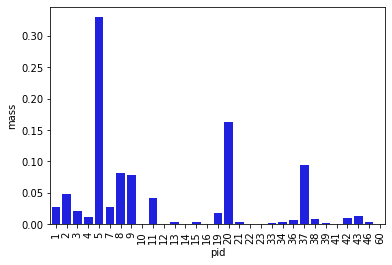

In [15]:
g = sns.barplot(x='pid', y='mass', data=df, ci=None, estimator=sum, color='blue')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

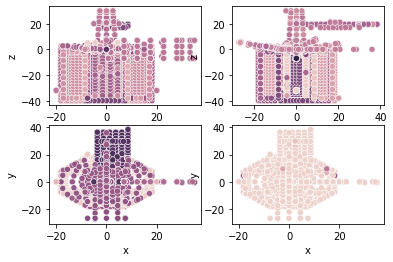

In [16]:
fig = plt.figure(figsize=(6,4))
sub1 = plt.subplot(2, 2, 1)
p1 = sns.scatterplot(data=df, x="x", y="z", hue="y", legend=False)
sub2 = plt.subplot(2, 2, 2)
p2 = sns.scatterplot(data=df, x="y", y="z", hue="x", legend=False)
sub3 = plt.subplot(2, 2, 3)
p3 = sns.scatterplot(data=df, x="x", y="y", hue="z", legend=False)
sub4 = plt.subplot(2, 2, 4)
p3 = sns.scatterplot(data=df, x="x", y="y", hue="mass", legend=False)

<AxesSubplot:xlabel='x_cat', ylabel='Count'>

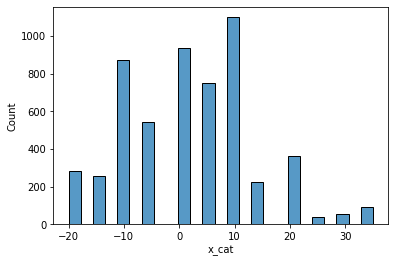

In [17]:
sns.histplot(data=df, x="x_cat")


<AxesSubplot:xlabel='x', ylabel='Count'>

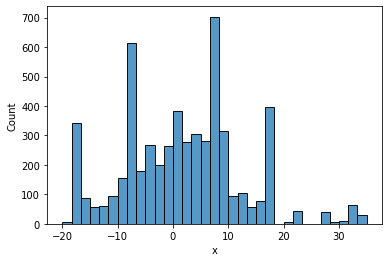

In [18]:
sns.histplot(data=df, x="x")

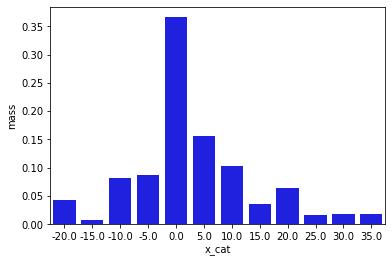

In [19]:
ax = sns.barplot(x='x_cat', y='mass', data=df, ci=None, estimator=sum, color='blue')

In [20]:
# x = sns.heatmap(data=df.mass, xticklabels=df.x, yticklabels=df.y, cmap="YlGnBu")

In [21]:
df.mean()

eid      2774.741445
pid        10.111534
mass        0.000181
x           1.799389
y           2.728231
z         -11.107283
x_cat       1.866739
y_cat       2.683324
z_cat     -11.100851
dtype: float64

In [22]:
df.max()

eid      5594.000000
pid        60.000000
mass        0.049524
x          35.000000
y          38.408110
z          30.000000
x_cat      35.000000
y_cat      40.000000
z_cat      30.000000
dtype: float64

In [23]:
df.min()

eid       1.000000
pid       1.000000
mass      0.000000
x       -20.000000
y       -27.471289
z       -40.000000
x_cat   -20.000000
y_cat   -25.000000
z_cat   -40.000000
dtype: float64

In [24]:
#to do:sns.histplot(data=df, x="mass") # doesnt work

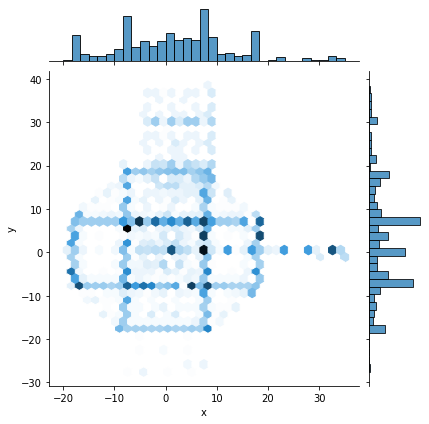

In [25]:
import numpy as np
plt

# Generate some test data
x = df.x
y = df.y

sns.jointplot(x=x, y=y, kind='hex')
plt.show()